<a href="https://colab.research.google.com/github/isismeira/classificador_com_arvores_de_decisao/blob/main/classifica%C3%A7%C3%A3o_com_%C3%A1rvore_de_decis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificador com Árvores de Decisão

De modo geral a Árvore de Decisão faz uma declaração e depois toma uma decisão baseada se a declaração é ou não é falsa

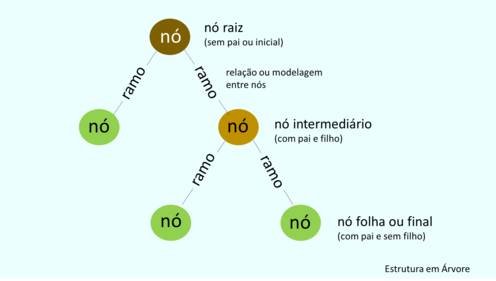

Quando uma árvore de decisão classifica as coisas em categorias é chamada de árvore de classificação e quando uma árvore de decisão prevê valores numéricos, é chamada de de Árvore de Regressão

## Importação de bibliotecas

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier # para utilizar as árvores de decisão
import graphviz # para visualizar essa árvores
from sklearn.tree import export_graphviz

## Conhecendo o dataset

In [2]:
dados = pd.read_csv('Credit.csv')
dados.shape

(1000, 21)

In [3]:
dados.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [4]:
previsores = dados.iloc[:,0:20].values
classe = dados.iloc[:,20].values

## Transformação de atributos

In [5]:
labelencoder = LabelEncoder()
previsores[:,0] = labelencoder.fit_transform(previsores[:,0])
previsores[:,2] = labelencoder.fit_transform(previsores[:,2])
previsores[:, 3] = labelencoder.fit_transform(previsores[:, 3])
previsores[:, 5] = labelencoder.fit_transform(previsores[:, 5])
previsores[:, 6] = labelencoder.fit_transform(previsores[:, 6])
previsores[:, 8] = labelencoder.fit_transform(previsores[:, 8])
previsores[:, 9] = labelencoder.fit_transform(previsores[:, 9])
previsores[:, 11] = labelencoder.fit_transform(previsores[:, 11])
previsores[:, 13] = labelencoder.fit_transform(previsores[:, 13])
previsores[:, 14] = labelencoder.fit_transform(previsores[:, 14])
previsores[:, 16] = labelencoder.fit_transform(previsores[:, 16])
previsores[:, 18] = labelencoder.fit_transform(previsores[:, 18])
previsores[:, 19] = labelencoder.fit_transform(previsores[:, 19])

## Divisão entre treino e teste

In [6]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 0)
X_teste

array([[2, 36, 3, ..., 1, 1, 1],
       [0, 9, 3, ..., 2, 0, 0],
       [0, 18, 3, ..., 1, 1, 1],
       ...,
       [0, 24, 1, ..., 1, 0, 1],
       [1, 27, 4, ..., 1, 1, 1],
       [1, 12, 3, ..., 1, 0, 1]], dtype=object)

## Treinamento e acurácia do modelo

In [ ]:
arvore = DecisionTreeClassifier()
arvore.fit(X_treinamento, y_treinamento)

Agora, fazer a exportação da árvore pra fazer a visualização dos dados posteriormente

In [8]:
export_graphviz(arvore, out_file = 'arvore.dot')

Para visualizar melhor como ficou a árvore, é interessante colar o arquivo 'arvore.dot' no site http://www.webgraphviz.com/ . Mas fica aqui uma imagem dessa árvore completa

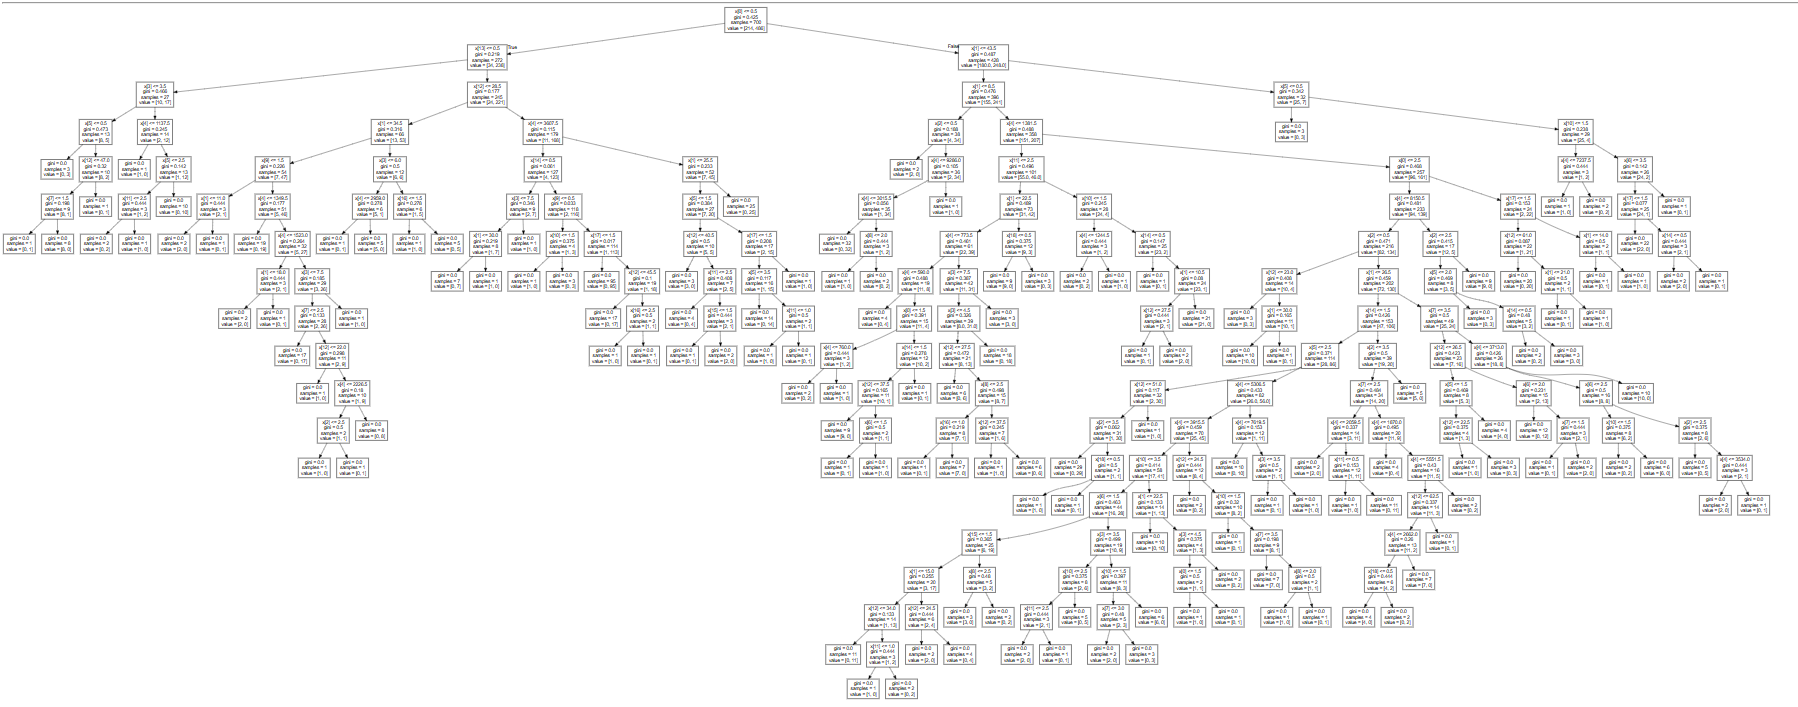

Essa estrutura está muito complexa devido a complexidade do dataset, que tem 21 atributos. Algumas maneiras de otimizar esse modelo é através da seleção de atributos ou pelo processo chamado de poda.

Mas antes disso, é melhor verificar como que a árvore de decisão se saiu nas previsões

In [9]:
previsoes = arvore.predict(X_teste)
previsoes

array(['bad', 'bad', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'good',
       'good', 'bad', 'bad', 'bad', 'bad', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'bad', 'bad', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'bad', 'bad', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'bad', 'good',
       'good', 'bad', 'good', 'bad', 'good', 'bad', 'bad', 'good', 'good',
       'bad', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'bad', 'bad', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad'

In [10]:
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[ 44,  42],
       [ 52, 162]])

Calculando a taxa de acerto

In [11]:
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.6866666666666666

Ao comparar a acurácia desse modelo com a do naive-bayes para o mesmo dataset, a árvore de decisão é ligeiramente inferior. No entanto não há muito o que otimizar no Naive Bayes além da seleção de atributos. Com a Árvore de Decisão ocorre o contrário, já que possui muitos hiperparâmetros, que você pode testar várias combinações para ver qual a melhor